Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Carlos Rafael Garduño Acolt"

---


# CS110 Fall 2019 - Assignment 3
# Decoding relationships between genes

## Submission Materials
Your assignment submission needs to include the following resources:

1. A PDF file must be the first resource and it will include all the answers to the questions above. 
2. Name the  PDF file: `<your_ name>.pdf`. For example, if you are a student name Dumbledore, your PDF file must be named “Dumbledore.pdf”. 
3. Make sure that you submit a neat, clearly presented, and easy-to-read PDF,  
4. Your PDF **must also** include the Python code as an appendix at the end. This will facilitate the process of writing feedback by anchoring the feedback to specific portions of the Python code using the grader tool.
5. Your second resource must be a single Python/Jupyter Notebook with your answers written in the assignment template provided.
    * Name this Jupyter Notebook also using the same convention as for the PDF file;  <student_name>.ipynb. For example, if you’re Dumbledore, your  Jupyter Notebook must be named “Dumbledore.ipynb”. 

## Notes on Grading Rubrics
* This is a strictly individual assignment. Everything you submit must reflect your own writing both in the text and Python programming.
* The assignment will be graded on the quality of your report, as well as: 
    * the LOs tagged in each question. 
    * the HCs **#professionalism** and **#algorithms** based on a holistic view of the assignment.

Please consult the rubrics for these LOs to optimally align your approach to the rubrics.
* As per the course’s policy on the syllabus, you will need to footnote at least **three** HCs by including a meaningful justification of the application of each HC. 
You will need to mindfully address how the HC enabled you to complete part of your work on this assignment. Please refer to refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.
* You will receive a warning on the first two weak applications of the HCs used in assignments since the beginning of the course. The counting system is cumulative, and these first two warnings will not generate a grade on the HC. The third and subsequent warnings will be graded on the specific HC using the HCs corresponding rubric. Please check what your HC counter is and prepare accordingly for this assignment.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:


`('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT')`,
`('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG')`,
`('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT')`,
`('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')`,
`('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC')`,
`('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG')`,
`('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')`

Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets: 

## Part A [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to session 12.2 (inclusively).

Submit this screenshot as a PNG file on your Python or Jupyter notebook. 


## Part B. Consider `Set_Strings` to answer the following questions below:

### Question 1. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.


In [ ]:
import numpy as np

#############

def lcs_length(x, y):
    
    m = len(x) #length of first string
    n = len(y) #length of second string
    
    b = [[0 for i in range(n+1)] for j in range(m+1)] #initializing tables
    c = [[0 for i in range(n+1)] for j in range(m+1)]
    
    for i in range(m+1): #iterating mn times
        
        for j in range(n+1): 
            
            
            if i == 0 or j == 0: #if base case then 0
               
                c[i][j] = 0
                
            elif x[i-1] == y[j-1]: #if the last letter in the slice is the same
                
                c[i][j] = c[i-1][j-1]+1
                b[i][j] = "NW"
                
            elif c[i-1][j] >= c[i][j-1]: #when different 
                
                c[i][j] = c[i-1][j]
                b[i][j] = "N"
                
            else:
                
                c[i][j] = c[i][j-1] #else
                b[i][j] = "W" 
                
    return c, b 

#############

def find_lcs(b, x, i, j, lcs): 
    if i == 0 or j==0: 
        return 
    if b[i][j] == "NW": 
        find_lcs(b, x, i-1, j-1, lcs) #function calls itself
        lcs.append(x[i-1])
    elif b[i][j] == "N":
        find_lcs(b, x, i-1, j, lcs) #recursion
    else:
        find_lcs(b, x, i, j-1, lcs) #recursion
    return lcs

#############

def print_lcs(b,x,i,j):

    lcs = [] #creates new list to keep data
    lcs = find_lcs(b, x, i+1, j+1, lcs) #finds longest common subsequence
    return lcs, len(lcs) #returns array and length

#############


def longestCommonSubsequence(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    
    Inputs:
    - x, y: strings
    """
    c, b = lcs_length(x, y)
    
    return print_lcs(b,x,len(x)-1,len(y)-1)[1]


    raise NotImplementedError()

In [ ]:
assert(longestCommonSubsequence('ZZZZZ', 'ZZZZZ')==5)
assert(longestCommonSubsequence('QWERTY', 'ASDFGHJ')==0)
assert(longestCommonSubsequence('1X2X3X4X5X6X', 'Y1Y2Y3Y4Y5Y6')==6) # 1,2,3,4,5,6
assert(longestCommonSubsequence('qMwIweryNeEeryerrutryuReVuAtur', 'zMvcxvzbIvcNnbEnRmbvnVmAmbc')==7) # M, I, N, E, R, V, A

In [ ]:
assert(longestCommonSubsequence('ABCBDAB', 'BDCABA')==4)

### Question 2. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. The matrix should be cast as a two-dimensional numpy array. **Store this 2D numpy array to a variable named `C`**.

Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

In [ ]:
##### Defines Set_Strings

Set_Strings = [('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'), 
               ('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'), 
               ('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'), 
               ('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'), 
               ('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'), 
               ('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'), 
               ('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')]


#####

def create_array(strings):

    C = np.zeros((7,7)) #Creates empty 7x7 array (zeros)


    for i in range(len(strings)): #Iterates once per possible string combination. 7x7 = 49 times
        for j in range(len(strings)):
            C[i,j]=longestCommonSubsequence(strings[i][1], strings[j][1]) #Stores length of LCS of string combination in 2D array

    return C #Prints array

In [ ]:
C = create_array(Set_Strings)
C

array([[64., 45., 49., 48., 50., 48., 38.],
       [45., 74., 47., 46., 59., 58., 45.],
       [49., 47., 81., 48., 57., 57., 39.],
       [48., 46., 48., 75., 53., 54., 38.],
       [50., 59., 57., 53., 98., 61., 43.],
       [48., 58., 57., 54., 61., 95., 45.],
       [38., 45., 39., 38., 43., 45., 50.]])

In [ ]:
a = 'ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'
b = 'CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'
c = 'TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'
d = 'AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'
e = 'GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'
f = 'ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG' 
g = 'ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG'

C[0,3]==longestCommonSubsequence(a, d)

True

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 3. [#DataStructures]

Manually examine the matrix you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with `Set_Strings`.


### Longest Common Subsequence

Although the LCS is a great tool to analyze how similar two strings are, as explained by Navarro (2001), LCS only accounts for two of the three kinds of mutations that the string set went through, and an analysis using it would be rather incomplete. For that reason I decided to use the Levenshtein distance as main metric for the reasoning, as this mathematical approach accounts for all three of the mutations we are dealing with.

### Levenshtein distance

After researching the topic of DNA management and analysis using programming languages, I decided to apply the Levenshtein distance (edit distance) as the ruling metric to assess the relationships between pairs of strings.

* **What is it?**

Named after its developer and Russian scientist Vladimir Levenshtein, the Levenshtein distance is a measure of the similarity between two strings, more specifically, the minimum number of single-character edits (insertions, deletions or substitutions) required to change one string into another. 

Let us define two strings:

    1 Source string (s)  
    2 Target string (t) 
   
The Levenshtein distance (LD) is the number of deletions, insertions, or substitutions required to transform *s* into *t*. The greater $LD(s, t)$ is, the more different *s* and *t* are from each other (Gilleland, 2019).

   Examples: 

If *s = "Minerva"* and *t = "Minerva"*, then $LD(s, t) = 0$, because no transformations are needed. The strings are already identical. 

If *s = "Minerva" and t = "Manerva"*, then $LD(s,t) = 1$, because one substitution (change "i" to "a") is sufficient to transform *s* into *t*. 

If *s = "Minerva"* and *t = "Manervan"*, then $LD(s,t) = 2$, because one substitution (change "i" to "a") and one insertion (add "n" at the end) are sufficient to transform *s* into *t*. 

*** Note that $LD(s, t) = LD(t, s)$, it takes the same number of edits to go from s* to *t* as from *t* to *s*.

* **How is it implemented?**

The Levenshtein distance is mathematically defined through the following recursive piecewise function (Klein, 2011):

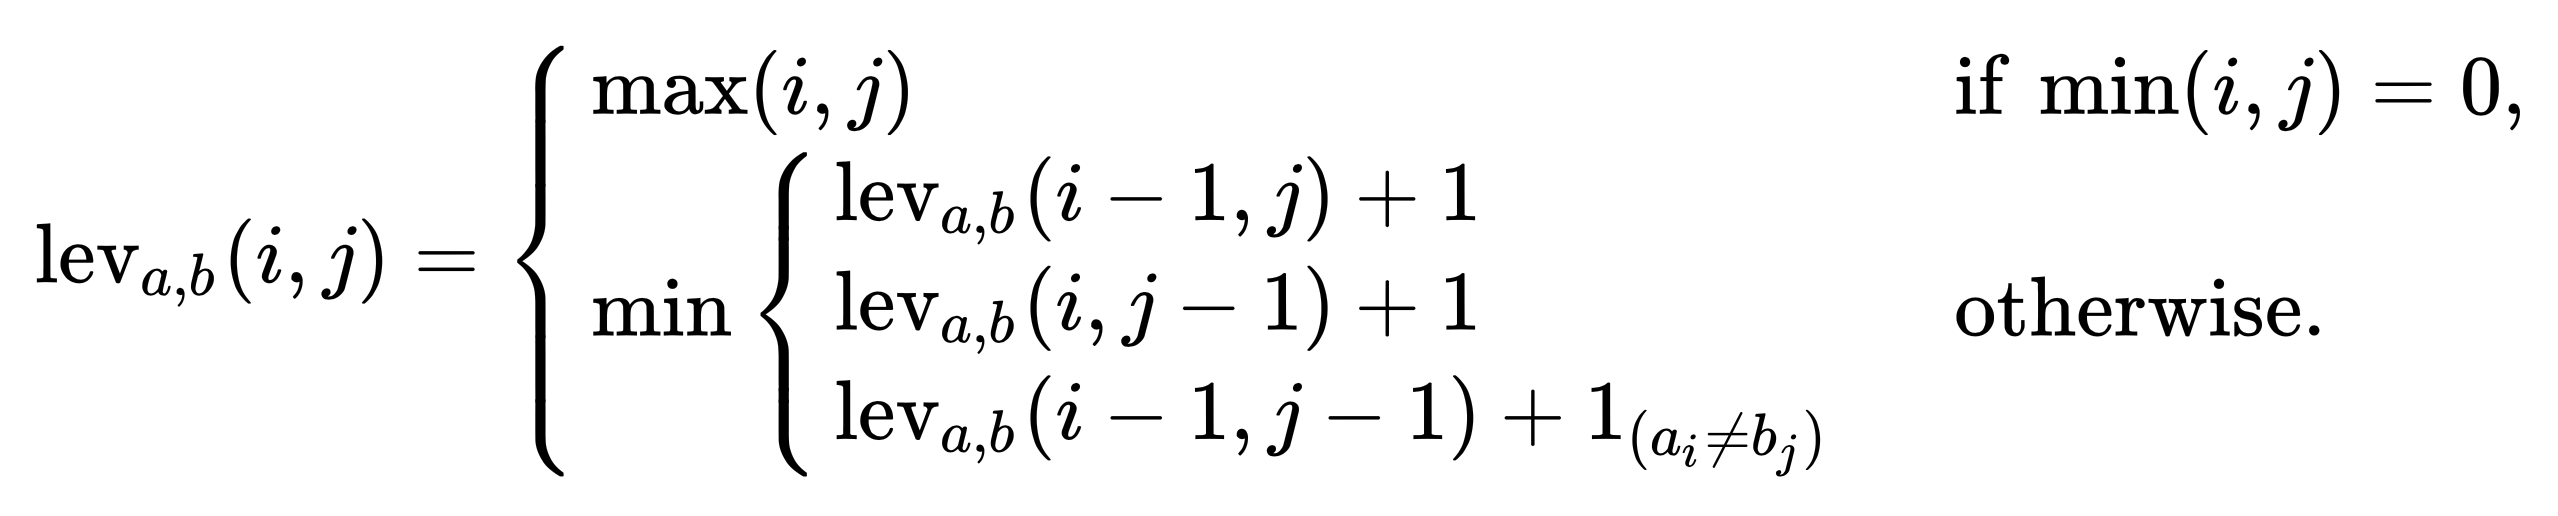

In [ ]:
Image('Levenshtein Function.png', width=700)

Where:

    a = Source string
    b = Target String
    i = Index for last character in Source string (length of a)
    j = Index for last character in Target string (length of b)


* **Why is it a good fit for this problem?**

Unlike the Longest Common Subsequence (LCS), Levenshtein distance accounts for insertions, deletions, and substitutions (Navarro, 2001). We know from the description of the String set that those were the kinds of mutations the DNA went through. Thus, LD will allow us to make accurate inferences about the nature of the collection. Note that, as explained before, the fact that LCS only accounts for 2 of the 3 kinds of mutation makes LD, in comparison, a better metric for the scenario.

* **Approaching the problem through Dynamic Programming:**





In [ ]:
## IMPLEMENTATION FOLLOWING THE PIECEWISE FUNCTION ABOVE AND USING DYNAMIC PROGRAMMING ##

def levenshtein_distance(a, b): # s = Source string // t = Target string
    """ 
    Calculates levenshtein distance between two strings.
    
    Inputs: 2 strings whose relationship is to be compared
    
    Outputs: Minimum number of edits to transform 'a' into 'b' and vice versa
        
    """
    
    #Initializes array for memoization

    n = len(a) # Establishes dimensions y-axis of array as number of characters in a 
    m = len(b) # Establishes dimensions x-axis of array as number of characters in b
    
    if n == 0: #If 
        return m
    elif m == 0:
        return n
    
    array = np.zeros((n+1,m+1)) #Creates empty array (zeros)
    
    for i in range(n+1): #Iterates once per character in a
        
        for j in range(m+1): #Iterates once per character in b
            
            array[i][0] = i #Populates first column with indices of characters in a
            array[0][j] = j #Populates first row with indices of characters in b
            
    #Piecewise function
    
    for j in range(1, m+1): #Iterates once per character in a
        
        for i in range(1, n+1): #Iterates once per character in b
            
            if a[i-1] == b[j-1]: #Compares a_i and b_j 
                cost = 0 #If same (no changes needed), then added cost = 0
            else:
                cost = 1 #If different (one more chage needed) cost = 1
                
            array[i][j] = min(array[i-1][j] + 1, #If deletions
                              array[i][j-1] + 1, #If insertion
                              array[i-1][j-1] + cost) #If substitution 
    #print(array)
    
    return array[i][j] # Returns
    
    

levenshtein_distance('ABCBDAB', 'BDCABA')

5.0

**We can build a similar array to the one we created to store the LCS data:**

In [ ]:
F = np.zeros((7,7)) #Creates empty 7x7 array (zeros)


for i in range(len(Set_Strings)): #Iterates once per possible string combination. 7x7 = 49 times
    for j in range(len(Set_Strings)):
        if Set_Strings[i][1] == Set_Strings[j][1]: #If comparing string to itself
            F[i,j] = float("inf") #Mark as infinite so it is not a confound 
                                  #while getting closest relationships
        else:
            F[i,j]=levenshtein_distance(Set_Strings[i][1], Set_Strings[j][1])  #calculates LD for each combo
        
F



array([[inf, 34., 34., 33., 53., 52., 26.],
       [34., inf, 41., 37., 41., 42., 33.],
       [34., 41., inf, 45., 51., 48., 43.],
       [33., 37., 45., inf, 51., 48., 39.],
       [53., 41., 51., 51., inf, 52., 56.],
       [52., 42., 48., 48., 52., inf, 51.],
       [26., 33., 43., 39., 56., 51., inf]])

* As mentioned before, the greater $LD(s, t)$ is, the more different *s* and *t* are from each other. Then, in order to infer the relationships between the strings, we assume that the closest relationships will be those of parent-child. In other words, the string to which you can get changing the least characters (the least present mutations) will be that of your parent or child:

    * We can assume this as the probabilities of mutation increase the farther we get in the genealogical tree, so we expect the number of different characters in two strings to be proportional to how far away they are from each other in the genealogical tree.

The next step in the analysis will be to find those closest relationships:

In [ ]:
for string in F:
    print(min(string)) #The closest relationships will be given by the minimum LDs
    
    #I improved the querying in quesrtion 4 by switching to a data frame, so the program outputs the 
    # names of the strings and not only their LDs

26.0
33.0
34.0
33.0
41.0
42.0
26.0


* We can get the relationships "coordinates" (string1, string2) from the previous table and we get that:

    * ***a*** is the closest to ***g***

    * ***b*** is the closest to ***g***

    * ***c*** is the closest to ***a***

    * ***d*** is the closest to ***a***

    * ***e*** is the closest to ***b***

    * ***f*** is the closest to ***b***

    * ***g*** is the closest to ***a***


* From the previous rationale we define this closest relationships as parent-child. Thus, we conclude that:

    1. Since ***a*** and ***b*** need the least edits to become ***g***, they are its children.

    2. Since ***c*** and ***d*** need the least edits to become ***a***, they are its children.

    3. Since ***e*** and ***f*** need the least edits to become ***b***, they are its children.
    
    
* Note that we can also infer the same relationships by looking at the strings' closeness to the parent string *g* (root of the tree)


In [ ]:
F[6] #Prints edit distance from every string to g (root)

array([26., 33., 43., 39., 56., 51., inf])

$lev(g, a) = 26 < lev(g, b) = 33 < lev(g, d)=39<lev(g, c) = 43<lev(g,f)=51<lev(g, e)=56$

The list above can be conceptualized as a 1D representation of the binary tree that answers our question (except for the position of the root):

    F[6] = [child1, child2, grandchild1.1, grandchild1.2, grandchild2.1, grandchild2.2]

Finally, we can present these relationshios on an actual genealogical tree:
    
             ___g___          --> Parent string ~ Tree root ~ First Generation
         ___/       \___
        a               b     --> Children ~ Tree Branches ~ Second Generation
       / \             / \
     c     d         e     f  --> Grandchildren ~ Tree Leaves ~ Third Generation

## Question 4. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them.

In [ ]:
import pandas as pd
def genealogy_tree(strings):
    """ 
    Builds Levenshtein Distances matrix with the input strings, then minimizes edits from each string,
    finds parent-child rrlationships and finally builds the genealogical binary tree.
    
    Inputs: List of N strings whose relationships you want to assess
    
    Outputs: Genealogical tree that best describes their relationships based on the Levenshtein Distance
        
    """
    
    #### BUILDS ARRAY OF LEVENSHTEIN DISTANCES #####
    
    n = len(strings)
    
    G = [[[] for i in range(n)] for j in range(n)] #Creates empty nxn array
    

    for i in range(n): #Iterates once per possible string combination. 
        for j in range(n):
            if strings[i][1] == strings[j][1]: #If comparing string to itself
                G[i][j] = float("inf") #Mark as infinite to it is not 
                                        #a confound while getting closest relationships
            else:
                G[i][j]=levenshtein_distance(strings[i][1], strings[j][1])#, strings[i][0], strings[j][0] 
                        #calculates LD for each combo
    
    #### CREATES ARRAY OF DIFFERENCE BETWEEN THE LENGTH OF STRING AND 
    ### ITS LONGEST COMMON SUBSEQUENCE WITH EACH ONE OF THE OTHER STRINGS
    
    C = create_array(Set_Strings) #Creates array of LCSs based on Question 2
    n = 0 #Starts counter
    D = 0 #Initializes variable that will take value of denominator for division

    for row in (C): #Iterates once per row
        n +=1 #Adds 1 to counter, selects largest number in set (length of string)
        D = row[n-1] #Sets variable for substraction to length of LCS

        for i in range(7): #Iterates 7 times per row
            if row[i]==D:
                C[n-1, i] = 0
            else:
                C[n-1, i]=(D-row[i]) #Gets difference
    
    
    #### ANALYSIS OF RELATIONSHIPS - LOOKS FOR CLOSEST RELATIONSHIPS, WHICH 
    ### ARE BETWEEN PARENT AND CHILDREN
    
    
    closest = [] #List for minimum LDs
    parents = [] #List for elements that are parents
    tree = [] #List for the final tree (output)

    for s in G:
        closest.append(s.index(min(s))) #Calculates each string's closest relationship
                                        #(shortest edit distance)
    
    
    #### LOOKS FOR PARENTS AND ROOT (FIRST-GENERATION STRING)
    

    for i in range(len(closest)): #For each closest LD-closest relationship:
        d = closest[i]

        if C[i,d]<C[d,i]: #Checks which string is closer to the LCS, 
                            #which must be the parent
            parents.append(i)
        else:
            parents.append(d) #Identifies parent and adds it to parents list


    root = max(set(parents), key=parents.count) #The string that is the closest to
                                                #the most strings (3) is the root

        
    #### ANALYSIS OF SUB-TREES DEPENDING ON CLOSENESS TO ROOT:
    # THE CLOSER YOU ARE TO THE ROOT, THE HIGHER YOU ARE ON THE TREE
        
        
    final = [root] #Initializes final list with the root as first element

    answer = G[root] #Looks at the relationships of each string to the root

    answer.sort() #Sorts them, the closer you are to the root, the higher up
                    #you are in the genealogic tree

    a = G[root] #Unsorted relationships to get indexes
    
    
    #### CREATES OUTPUT ARRAY

    
    for u in range(n-1): #Creates output tree

        final.append(a.index(answer[u])) #Gets order from closesness to root (answer[])
                                        # and indexes from unsorted list

    for ind in final:                #Takes list of indexes and transforms it into
                                    #correspondent letters
        tree.append(Set_Strings[ind][0])
    
    print('Array Version: ', tree)
    
    #### 2D TREE
    
    levels = int((n-1)/2) #Calculates levels of tree
    
    print("2D Version:")
    
    for level in range(levels):
        if level == 0: 
            print("Generation ", level, ":", tree[level:level+1])
        
        else:
            print("Generation ", level, ":", tree[2*level-1:level*(level+2)])
        
    
    return 
        
    


In [ ]:
G=genealogy_tree(Set_Strings)

G

Array Version:  ['g', 'a', 'b', 'c', 'd', 'e', 'f']
2D Version:
Generation  0 : ['g']
Generation  1 : ['a', 'b']
Generation  2 : ['c', 'd', 'e', 'f']


### Question 5. [#ComputationalCritique] 

Write any strengths or weaknesses of your suggested algorithm.


**Strengths:**

* The relationships between the nodes are assessed through the Levenshtein distance instead of only using the length of the Longest Common Subsequence, which makes it more accurate because, as mentioned before, the LD accounts for insertions, deletions, and substitutions, while the LCS only accounts for insertions and deletions. We know that the strings went through those three kinds of mutations. Thus, basing our inferences in LCS is an incomplete analysis.


* Along the same lines, implementing the Levenshtein distance (and more generally using a dynamic programming algorithm) represents the fastest way to compute the similarities between strings. As Hardesty (2015) explains, computer scientists have not been able to find a better approach to the problem of comparing DNA strings in over 50 years now, which means that we are tackling the problem as fast as it is currently possible.


* Since the code generalizes for N strings, it allows the user to input any number of strings they want to analyze, and the program is able to create a proper matrix, make inferences, and output as many levels of the tree as are required.


**Weaknesses:**

* Although we tackle the problem parsimoniously and as fast as we can, the time and space complexity of the algorithm is not efficient if we were to apply this to a large-enough DNA string to make such inferences in real-life: both computing the LD and LCS of any pair of strings will require to build a matrix of size NxM, where N and M are the lengths of the strings. Consequently, the complexity is $Θ(NM)$, and if we assume that we will be comparing strings of around the same length (this will vary depending on the probabilities of mutation), then $Θ(N^2)$. DNA strings have millions of consecutive letters (the complete human genome has three billion letters), which constrains the applications of the algorithm to shorter strings (how short will depend on the computer time and storage we have available).


* The applicability of the algorithm will also be constrained to problems of the same nature as the example (strings that went through deletion, insertion, and substitution). However, in nature, there are other kinds of mutations that the code does not account for, like frameshift or transposition, so evaluating relationships between strings closer to reality might require some changes to account for more types of mutation.


* Moreover, the present implementation does not account for edge cases including when more than two strings require the same number of edits to become another string (lines 77 to 88). In other words, the code assumes that each parent will have precisely 2 children and that the LD to the root will be directly proportional to the string's closeness to the root (which can vary and not be true as mutation probabilities increase).

#########################
* #constraints: The explanation elaborates on how the computational complexity of the algorithm is too high in order to extrapolate the technique to a real-world scenario. It is true that it can still be use to assess small portions of strings, but we could probably not infer parent-child relationships from strings short enough to be able to run the algorithm.

### Question 6. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.

For the LD array:

1. Building the array requires to run "levenshtein_distance(a, b)" $(N^2)- N$~$(N^2)$ times (since when comparing the string to itself we just append +oo so we substract N).

2. Running "levenshtein_distance(a, b)" has a complexity of $Θ(nm) + Θ(n)+ Θ(m) $(where n and m are the lenght of the strings, that if we assume is similar ~$ Θ(n^2) $ and if we consider M as the length of gene ~ $ Θ(M^2) $
     * In conclusion, building the array has a complexity of $ Θ(N^2M^2) $ 
    
For the LCS array:

1. Similar to the LD array it also require to build a matrix of size $(N^2)$ and to run longestCommonSubsequence(x, y) that also has a complexity of $ Θ(M^2) $ 

2. Getting the difference between the LCS and the length of the string (lines 36 to 45) requires $(N^2)- N$~$(N^2)$ steps 

     * In conclusion, building the differences array has a complexity of $ Θ(N^2M^2+N^2) $ ~ $ Θ(N^2M^2) $ 

For analysis:

1. The rest of the analysis requires to run 4 for-loops over N which was a complexity of $ Θ(4N) $ ~ $ Θ(N) $

2. We also sort the output list before the output using Python's built-in .sort(), which has a complexity of: $O(nlogn)$

3. The output of the 2D tree has a complexity of $Θ(L)$ where L is the number of levels. However, the number of levels increases really slowly, as we need to duplicate the number of strings to get one level up, so we do not expect this take any large time, so we can just say $Θ(L)$ ~ $Θ(1)$

     * In conclusion, the analysis has a complexity of  $ Θ(N)+O(NlogN) $ ~ $ O(NlogN) $
     


**The whole algorithm:**

  * We can sum everything and we get:  $ Θ(N^2M^2) + Θ(N^2M^2)+O(NlogN)$ ~ $ Θ(2N^2M^2)+O(NlogN)$ 
     
      **~ $Θ(2N^2M^2)$** (As we consider the input to scale asymptotically)

### Question 7. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i, p_d,$ and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i, p_d,$ and $p_c$.). Make sure you include a working Python estimation that would take your algorithmic strategy into practice.

Fortunately, the Levenshtein distance can be broken down into the three mutations, and thus, it is possible to add counters to each case and get an estimation of the probabilities taking a frequentist approach and using those metrics.
As it can be seen below the probabilities vary from combination to combination. However, some boundaries can be estimated:


* Probability of insertions: around 45%
* Probability of deletions: around 40%
* Probability of substitutions: around 4%


I believe that these estimates might be far from the actual probabilities since the approach I used to get those take all the possible combinations and not only the ones that yield the actual result we have (going from one string to the other). I started developing a new approach in which I only take into account the combinations that yield the result. However it has a bug that I could not solve due to time constraints. *Note that I left the 'draft' of this implementation at the end.

In [ ]:
def levenshtein_distance_prob(a, b): # s = Source string // t = Target string
    """ 
    Calculates mutation probabilities between two strings.
    
    Inputs: 2 strings whose relationship is to be compared
    
    Outputs: probabilities of insertions, deletions and substitutions following a 
    frequentist approach
        
    """
    
    #Initializes counters for frequentist inference of probability
    
    insertions = 0
    deletions = 0
    substitutions = 0 
    
    
    #Initializes array for memoization

    n = len(a) # Establishes dimensions y-axis of array as number of characters in a 
    m = len(b) # Establishes dimensions x-axis of array as number of characters in b
    
    if n == 0: #If 
        return m
    elif m == 0:
        return n
    
    array = np.zeros((n+1,m+1)) #Creates empty array (zeros)
    
    for i in range(n+1): #Iterates once per character in a
        
        for j in range(m+1): #Iterates once per character in b
            
            array[i][0] = i #Populates first column with indices of characters in a
            array[0][j] = j #Populates first row with indices of characters in b
            
    #Piecewise function
    
    for j in range(1, m+1): #Iterates once per character in a
        
        for i in range(1, n+1): #Iterates once per character in b
            
            if a[i-1] == b[j-1]: #Compares a_i and b_j 
                cost = 0 #If same (no changes needed), then added cost = 0
            else:
                cost = 1 #If different (one more chage needed) cost = 1
            
            dele = array[i-1][j] + 1 #If deletions
            inser = array[i][j-1] + 1 #If insertion
            subs = array[i-1][j-1] + cost #If substitution 
            
            if min(dele, inser, subs)==dele:
                array[i][j] = dele
                deletions +=1
                
            elif min(dele, inser, subs)==inser:
                array[i][j] = inser
                insertions +=1
                
            elif min(dele, inser, subs)==subs and cost==1:
                array[i][j] = subs
                substitutions +=1 
            else:
                array[i][j] = subs
            
    print( 'Probability of Insertions: ', insertions/(n*m))
    
    print( 'Probability of Deletions: ', deletions/(n*m))

    print( 'Probability of Substitutions: ', substitutions/(n*m))
    
    
    return array[i][j]

In [ ]:
levenshtein_distance_prob(g, a)

Probability of Insertions:  0.4865625
Probability of Deletions:  0.3734375
Probability of Substitutions:  0.0371875


26.0

In [ ]:
levenshtein_distance_prob(g, b)

Probability of Insertions:  0.522972972972973
Probability of Deletions:  0.3327027027027027
Probability of Substitutions:  0.0472972972972973


33.0

In [ ]:
levenshtein_distance_prob(a, c)

Probability of Insertions:  0.47704475308641975
Probability of Deletions:  0.38522376543209874
Probability of Substitutions:  0.03742283950617284


34.0

In [ ]:
levenshtein_distance_prob(a, d)

Probability of Insertions:  0.43166666666666664
Probability of Deletions:  0.421875
Probability of Substitutions:  0.04625


33.0

In [ ]:
levenshtein_distance_prob(b, e)

Probability of Insertions:  0.49931053502482076
Probability of Deletions:  0.36803640375068947
Probability of Substitutions:  0.04054054054054054


41.0

In [ ]:
levenshtein_distance_prob(b, f)

Probability of Insertions:  0.47041251778093884
Probability of Deletions:  0.3844950213371266
Probability of Substitutions:  0.04793741109530583


42.0

In [ ]:
def probabilities(array, a,b):
    
    insertions = 0
    deletions = 0
    substitutions = 0 
    
    
    n = min(len(a), len(b) )
    m = max(len(a), len(b) )       

    for i in range(1,n): #Iterates once per character in b

        if a[i-1] == b[i-1]: #Compares a_i and b_j 
            cost = 0 #If same (no changes needed), then added cost = 0
        else:
            cost = 1 #If different (one more chage needed) cost = 1

        dele = array[i-1][i] + 1 #If deletions
        inser = array[i][i-1] + 1 #If insertion
        subs = array[i-1][i-1] + cost #If substitution 

        if min(dele, inser, subs)==dele:
            deletions +=1
            print(dele)

        elif min(dele, inser, subs)==inser:
            insertions +=1
            print(inser)

        elif min(dele, inser, subs)==subs and cost==1:
            substitutions +=1 
            print(subs)
        else:
            print(subs)
            
    if len(a)>len(b):
        
        i+=1
        
        for j in range(i,m): #Iterates once per character in b
            

            if a[j-1] == b[i-1]: #Compares a_i and b_j 
                cost = 0 #If same (no changes needed), then added cost = 0
            else:
                cost = 1 #If different (one more chage needed) cost = 1

            dele = array[j-1][i] + 1 #If deletions
            inser = array[j][i-1] + 1 #If insertion
            subs = array[j-1][i-1] + cost #If substitution 

            if min(dele, inser, subs)==dele:
                deletions +=1
                print(dele)

            elif min(dele, inser, subs)==inser:
                insertions +=1
                print(inser)

            elif min(dele, inser, subs)==subs and cost==1:
                substitutions +=1 
                print(subs)
            else:
                print(subs)
        
        
    return deletions, insertions, substitutions

* #composition: The assignment had many instances in which I was required to give parsimonious written explanations of topics and my thought process to tackle the problem and get to a solution. The language of these explanations fits the context of the paper, the style of the writting is consistent throughout the text. The descriptions make use of nuances of scientific writing in order to be precise and unambiguous.


* #sourcequality: The assignment required a lot of external research, and it was important to be aware of the source of the information that I used and applied while solving the problem and writing the explanations. All of my references come from reliable sources, (incluiding a peer-reviewed paper), they are all recent and relevant for the context and subject.

### References:

1. Gilleland, M. (2019). Levenshtein Distance, in Three Flavors. Merriam Park Software. Retrieved from: https://people.cs.pitt.edu/~kirk/cs1501/Pruhs/Spring2006/assignments/editdistance/Levenshtein%20Distance.htm


2. Hardesty, L. (2015). Longstanding problem put to rest. MIT News Office. Retrieved from: http://news.mit.edu/2015/algorithm-genome-best-possible-0610


3. Navarro, G. (2011). A guided tour to approximate string matching. ACM Computing Surveys. doi:10.1145/375360.375365
    